# Self study 7

In this self study we start to investigate some community detection (graph clustering) techniques. As toy datasets we use the Lazega Law and the Zachary Karate club networks. Some of the following code was already used in self study 4.

In [10]:
import numpy as np
import networkx as nx
import scipy as sp
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.quality import modularity
import random

In [2]:
def get_att_array(G,att_name):
    ret_array=np.zeros(nx.number_of_nodes(G))
    for i,n in enumerate(G.nodes()):
        ret_array[i]=G.nodes[n][att_name]
    return(ret_array)

Remember that the edges in the Lazega network represent a directed 'friendship' relation, and that nodes have attributes Practice, Age, Seniority, Office, Gender and Status. For the purpose of this self study we turn the directed graph into an undirected one.

In the following you can see that already the 'Kamada Kawai' layout algorithm separates the nodes somewhat according tho the office location:

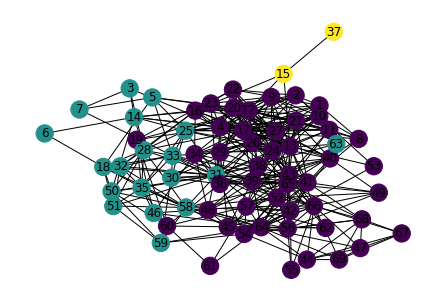

In [3]:
lazega=nx.readwrite.graphml.read_graphml('lazega.gml')
lazega=lazega.to_undirected()
nx.draw_kamada_kawai(lazega,with_labels=True,node_color=get_att_array(lazega,'Office'))

We next load the Zachary network. This is a built-in of networkx:

In [4]:
zachary = nx.karate_club_graph()

This does not contain the information on the two "ground truth" communities. This is here manually constructed:

In [22]:
zachary_gt=np.array([0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1])
zachary_gtc = [set(),set()]
for i in range(len(zachary_gt)):
    if zachary_gt[i] == 0:
        zachary_gtc[0] = zachary_gtc[0].union(set([i]))
    else:
        zachary_gtc[1] = zachary_gtc[1].union(set([i]))

Using a generic drawing method, we obtain a layout that separates the two ground truth communities quite well:

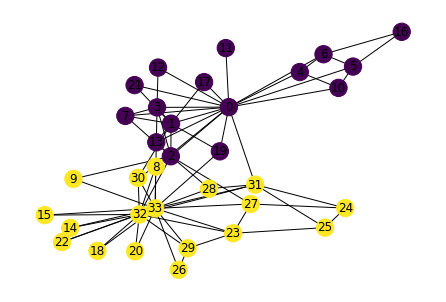

In [6]:
nx.draw(zachary,with_labels=True,node_color=zachary_gt)

**Task 1:** Use the networkx implementations of the Kernighan-Lin and Newman-Girvan algorithms to divide the Lazega and Zachary networks into 2,3,4 communities. Compare the communities returned by the algorithms with ground truth clusters in the network: the ground truth communities in Zachary, and the clusters defined by node attributes Office, Gender, Practice, Status in Lazega.

In [8]:
# Function to partition an array of values into a list of sets containing the indices of identical values
def make_partition(arr):
    result = {}
    for i in range(len(arr)):
        v = arr[i]
        if v in result.keys():
            result[v].append(str(i+ 1))
        else:
            result[v] = [str(i+ 1)]
    return [set(j) for j in result.values()]

Similarity with attribute Office
Cosine sim = 0.6524986798170382
Modularity ground truth: 0.019418847871558616
Modularity clustering: 0.30479393973655944
Difference: 0.2853750918650008

Similarity with attribute Gender
Cosine sim = 0.648074069840786
Modularity ground truth: -0.020854140363439924
Modularity clustering: 0.30479393973655944
Difference: 0.32564808009999935

Similarity with attribute Practice
Cosine sim = 0.6631316534019392
Modularity ground truth: -0.008906979227517403
Modularity clustering: 0.30479393973655944
Difference: 0.3137009189640768

Similarity with attribute Status
Cosine sim = 0.5607635707790987
Modularity ground truth: 0.1739185055370255
Modularity clustering: 0.30479393973655944
Difference: 0.13087543419953393



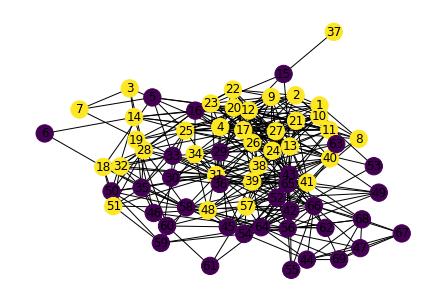

In [63]:
### Lazega 2 clusters with kernighen lin
R = list(kernighan_lin_bisection(lazega))

clusters = [1 if str(i) in R[1] else 0 for i in range(1, 70)]

nx.draw_kamada_kawai(lazega,with_labels=True,node_color=clusters)

attr = ['Office', 'Gender', 'Practice', 'Status']
for a in attr:
    print(f'Similarity with attribute {a}')
    gt = get_att_array(lazega, a)
    comp = np.dot(clusters, gt) / (np.linalg.norm(clusters) * np.linalg.norm(gt))
    print(f'Cosine sim = {comp}')
    c_mod = modularity(lazega, R)
    t_mod = modularity(lazega, make_partition(gt))
    print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {c_mod - t_mod}\n')


Similarity with attribute Office
Cosine sim = 0.6137760179073902
Modularity ground truth: 0.019418847871558616
Modularity clustering: 0.30242586415914474
Difference: 0.2830070162875861

Similarity with attribute Gender
Cosine sim = 0.6096139872764946
Modularity ground truth: -0.020854140363439924
Modularity clustering: 0.30242586415914474
Difference: 0.32328000452258465

Similarity with attribute Practice
Cosine sim = 0.6365081383602177
Modularity ground truth: -0.008906979227517403
Modularity clustering: 0.30242586415914474
Difference: 0.3113328433866621

Similarity with attribute Status
Cosine sim = 0.5070397938968603
Modularity ground truth: 0.1739185055370255
Modularity clustering: 0.30242586415914474
Difference: 0.12850735862211923



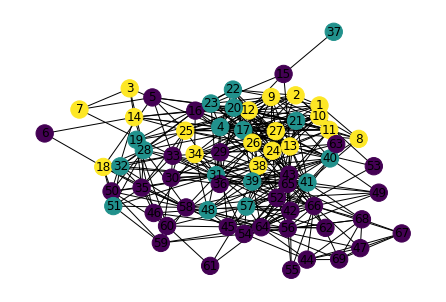

In [19]:
### Lazega 3 clusters with kernighan lin
R = list(kernighan_lin_bisection(lazega))

j = random.randint(0,1)
sub_g = lazega.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))
clusters = [0 if str(i) in R[0] else 1 if str(i) in R[1] else 2 for i in range(1,70)]

nx.draw_kamada_kawai(lazega,with_labels=True,node_color=clusters)

attr = ['Office', 'Gender', 'Practice', 'Status']
for a in attr:
    print(f'Similarity with attribute {a}')
    gt = get_att_array(lazega, a)
    comp = np.dot(clusters, gt) / (np.linalg.norm(clusters) * np.linalg.norm(gt))
    print(f'Cosine sim = {comp}')
    c_mod = modularity(lazega, R)
    t_mod = modularity(lazega, make_partition(gt))
    print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {c_mod - t_mod }\n')

Similarity with attribute Office
Cosine sim = 0.5872032458028803
Modularity ground truth: 0.019418847871558616
Modularity clustering: 0.31866948071934215
Difference: -0.2992506328477835

Similarity with attribute Gender
Cosine sim = 0.6387663015999682
Modularity ground truth: -0.020854140363439924
Modularity clustering: 0.31866948071934215
Difference: -0.33952362108278206

Similarity with attribute Practice
Cosine sim = 0.5879010385051147
Modularity ground truth: -0.008906979227517403
Modularity clustering: 0.31866948071934215
Difference: -0.3275764599468596

Similarity with attribute Status
Cosine sim = 0.7331378559652508
Modularity ground truth: 0.1739185055370255
Modularity clustering: 0.31866948071934215
Difference: -0.14475097518231664



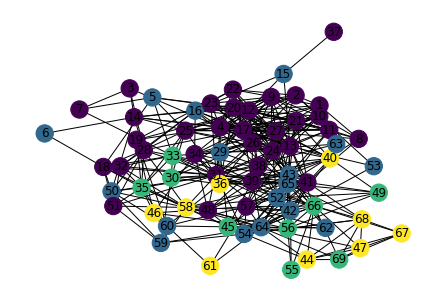

In [20]:
### Lazega 4 clusters with kernighen lin
R = list(kernighan_lin_bisection(lazega))

j = random.randint(0,1)
sub_g = lazega.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))

j = random.randint(0,2)
sub_g = lazega.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))

clusters = [0 if str(i) in R[0] else 1 if str(i) in R[1] else 2 if str(i) in R[2] else 3 for i in range(1,70)]

nx.draw_kamada_kawai(lazega,with_labels=True,node_color=clusters)

attr = ['Office', 'Gender', 'Practice', 'Status']
for a in attr:
    print(f'Similarity with attribute {a}')
    gt = get_att_array(lazega, a)
    comp = np.dot(clusters, gt) / (np.linalg.norm(clusters) * np.linalg.norm(gt))
    print(f'Cosine sim = {comp}')
    c_mod = modularity(lazega, R)
    t_mod = modularity(lazega, make_partition(gt))
    print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}\n')

Cosine sim = 0.9718253158075502
Modularity ground truth: 0.37146614069691
Modularity clustering: 0.3717948717948718
Difference: -0.00032873109796183186


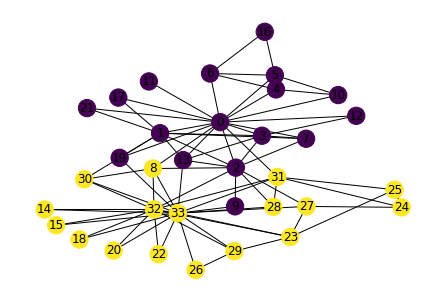

In [24]:
### Zachary 2 clusters kernighan lin
R = kernighan_lin_bisection(zachary)
clusters = [1 if i in R[1] else 0 for i in range(34)]
nx.draw_kamada_kawai(zachary,with_labels=True,node_color=clusters)


comp = np.dot(clusters, zachary_gt) / (np.linalg.norm(clusters) * np.linalg.norm(zachary_gt))
print(f'Cosine sim = {comp}')
c_mod = modularity(zachary, R)
t_mod = modularity(zachary, zachary_gtc)
print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}')

Cosine sim = 0.923869770874312
Modularity ground truth: 0.37146614069691
Modularity clustering: 0.3747534516765286
Difference: -0.0032873109796186517


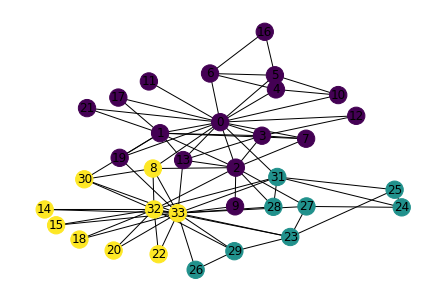

In [26]:
### Zachary 3 clusters kernighan lin
R = list(kernighan_lin_bisection(zachary))



j = random.randint(0,1)
sub_g = zachary.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))
clusters = [0 if i in R[0] else 1 if i in R[1] else 2 for i in range(34)]

nx.draw_kamada_kawai(zachary,with_labels=True,node_color=clusters)

comp = np.dot(clusters, zachary_gt) / (np.linalg.norm(clusters) * np.linalg.norm(zachary_gt))
print(f'Cosine sim = {comp}')
c_mod = modularity(zachary, R)
t_mod = modularity(zachary, zachary_gtc)
print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}')

Cosine sim = 0.09053574604251854
Modularity ground truth: 0.37146614069691
Modularity clustering: 0.35100262984878366
Difference: 0.02046351084812631


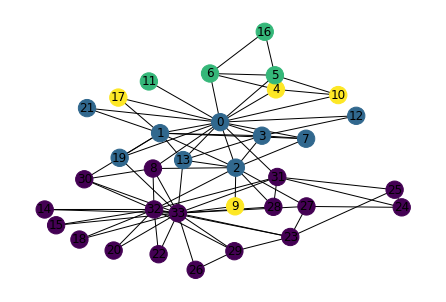

In [60]:
### Zachary 4 clusters kernighan lin
R = list(kernighan_lin_bisection(zachary))

j = random.randint(0,1)
sub_g = zachary.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))

j = random.randint(0,2)
sub_g = zachary.subgraph(R[j])
R.remove(R[j])
R.extend(list(kernighan_lin_bisection(sub_g)))

clusters = [0 if i in R[0] else 1 if i in R[1] else 2 if i in R[2] else 3 for i in range(34)]

nx.draw_kamada_kawai(zachary,with_labels=True,node_color=clusters)

comp = np.dot(clusters, zachary_gt) / (np.linalg.norm(clusters) * np.linalg.norm(zachary_gt))
print(f'Cosine sim = {comp}')
c_mod = modularity(zachary, R)
t_mod = modularity(zachary, zachary_gtc)
print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}')

Similarity with attribute Office
Cosine sim = 0.17801724872907798
Modularity ground truth: 0.019418847871558616
Modularity clustering: 0.004934014233578955
Difference: -0.014484833637979661

Similarity with attribute Gender
Cosine sim = 0.12909944487358055
Modularity ground truth: -0.020854140363439924
Modularity clustering: 0.004934014233578955
Difference: 0.02578815459701888

Similarity with attribute Practice
Cosine sim = 0.11322770341445956
Modularity ground truth: -0.008906979227517403
Modularity clustering: 0.004934014233578955
Difference: 0.013840993461096358

Similarity with attribute Status
Cosine sim = 0.10910894511799617
Modularity ground truth: 0.1739185055370255
Modularity clustering: 0.004934014233578955
Difference: -0.16898449130344656



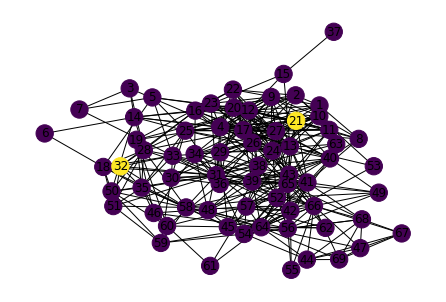

In [64]:
### Lazega 2 clusters with gervan newman
R = girvan_newman(lazega)
R = next(R)

clusters = [1 if str(i) in R[1] else 0 for i in range(1, 70)]

nx.draw_kamada_kawai(lazega,with_labels=True,node_color=clusters)

attr = ['Office', 'Gender', 'Practice', 'Status']
for a in attr:
    print(f'Similarity with attribute {a}')
    gt = get_att_array(lazega, a)
    comp = np.dot(clusters, gt) / (np.linalg.norm(clusters) * np.linalg.norm(gt))
    print(f'Cosine sim = {comp}')
    c_mod = modularity(lazega, R)
    t_mod = modularity(lazega, make_partition(gt))
    print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {c_mod - t_mod}\n')


Similarity with attribute Office
Cosine sim = 0.2398160484396361
Modularity ground truth: 0.019418847871558616
Modularity clustering: 0.00489004466052349
Difference: -0.014528803211035127

Similarity with attribute Gender
Cosine sim = 0.14907119849998599
Modularity ground truth: -0.020854140363439924
Modularity clustering: 0.00489004466052349
Difference: 0.025744185023963414

Similarity with attribute Practice
Cosine sim = 0.19611613513818404
Modularity ground truth: -0.008906979227517403
Modularity clustering: 0.00489004466052349
Difference: 0.013797023888040893

Similarity with attribute Status
Cosine sim = 0.18898223650461363
Modularity ground truth: 0.1739185055370255
Modularity clustering: 0.00489004466052349
Difference: -0.16902846087650203



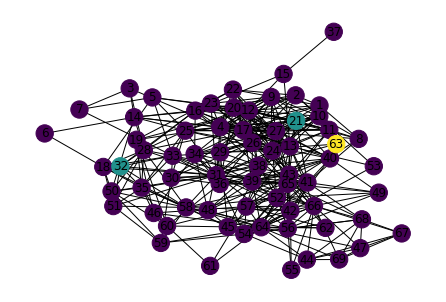

In [65]:
### Lazega 3 clusters with gervan newman
R = girvan_newman(lazega)
next(R)
R = next(R)

clusters = [0 if str(i) in R[0] else 1 if str(i) in R[1] else 2 for i in range(1,70)]

nx.draw_kamada_kawai(lazega,with_labels=True,node_color=clusters)

attr = ['Office', 'Gender', 'Practice', 'Status']
for a in attr:
    print(f'Similarity with attribute {a}')
    gt = get_att_array(lazega, a)
    comp = np.dot(clusters, gt) / (np.linalg.norm(clusters) * np.linalg.norm(gt))
    print(f'Cosine sim = {comp}')
    c_mod = modularity(lazega, R)
    t_mod = modularity(lazega, make_partition(gt))
    print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {c_mod - t_mod}\n')


Similarity with attribute Office
Cosine sim = 0.3033459730122076
Modularity ground truth: 0.019418847871558616
Modularity clustering: 0.07145997826646822
Difference: 0.052041130394909596

Similarity with attribute Gender
Cosine sim = 0.3299831645537222
Modularity ground truth: -0.020854140363439924
Modularity clustering: 0.07145997826646822
Difference: 0.09231411862990814

Similarity with attribute Practice
Cosine sim = 0.279078152825719
Modularity ground truth: -0.008906979227517403
Modularity clustering: 0.07145997826646822
Difference: 0.08036695749398562

Similarity with attribute Status
Cosine sim = 0.3884492980336779
Modularity ground truth: 0.1739185055370255
Modularity clustering: 0.07145997826646822
Difference: -0.10245852727055729



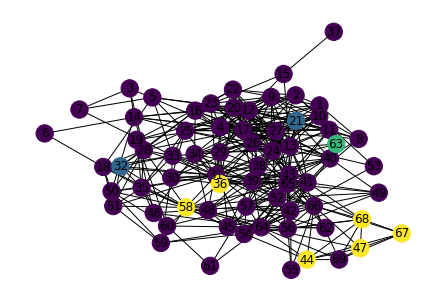

In [66]:
### Lazega 4 clusters with gervan newman
R = girvan_newman(lazega)
next(R)
next(R)
R = next(R)

clusters = [0 if str(i) in R[0] else 1 if str(i) in R[1] else 2 if str(i) in R[2] else 3 for i in range(1,70)]

nx.draw_kamada_kawai(lazega,with_labels=True,node_color=clusters)

attr = ['Office', 'Gender', 'Practice', 'Status']
for a in attr:
    print(f'Similarity with attribute {a}')
    gt = get_att_array(lazega, a)
    comp = np.dot(clusters, gt) / (np.linalg.norm(clusters) * np.linalg.norm(gt))
    print(f'Cosine sim = {comp}')
    c_mod = modularity(lazega, R)
    t_mod = modularity(lazega, make_partition(gt))
    print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {c_mod - t_mod}\n')

Cosine sim = 0.9733285267845753
Modularity ground truth: 0.37146614069691
Modularity clustering: 0.3599605522682445
Difference: 0.011505588428665448


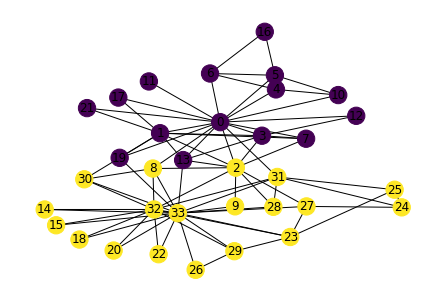

In [67]:
### Zachary 2 clusters girvan newman
R = girvan_newman(zachary)
R = next(R)
clusters = [1 if i in R[1] else 0 for i in range(34)]
nx.draw_kamada_kawai(zachary,with_labels=True,node_color=clusters)


comp = np.dot(clusters, zachary_gt) / (np.linalg.norm(clusters) * np.linalg.norm(zachary_gt))
print(f'Cosine sim = {comp}')
c_mod = modularity(zachary, R)
t_mod = modularity(zachary, zachary_gtc)
print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}')

Cosine sim = 0.9547859244962514
Modularity ground truth: 0.37146614069691
Modularity clustering: 0.34878369493754113
Difference: 0.02268244575936884


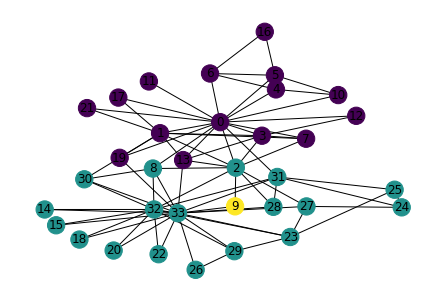

In [70]:
### Zachary 3 clusters girvan newman
R = girvan_newman(zachary)
next(R)
R = next(R)
clusters = [0 if i in R[0] else 1 if i in R[1] else 2 for i in range(34)]
nx.draw_kamada_kawai(zachary,with_labels=True,node_color=clusters)


comp = np.dot(clusters, zachary_gt) / (np.linalg.norm(clusters) * np.linalg.norm(zachary_gt))
print(f'Cosine sim = {comp}')
c_mod = modularity(zachary, R)
t_mod = modularity(zachary, zachary_gtc)
print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}')

Cosine sim = 0.6876141641725291
Modularity ground truth: 0.37146614069691
Modularity clustering: 0.3632478632478633
Difference: 0.008218277449046685


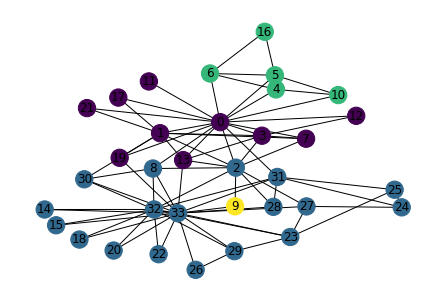

In [71]:
### Zachary 4 clusters girvan newman
R = girvan_newman(zachary)
next(R)
next(R)
R = next(R)
clusters = [0 if i in R[0] else 1 if i in R[1] else 2 if i in R[2] else 3 for i in range(34)]
nx.draw_kamada_kawai(zachary,with_labels=True,node_color=clusters)


comp = np.dot(clusters, zachary_gt) / (np.linalg.norm(clusters) * np.linalg.norm(zachary_gt))
print(f'Cosine sim = {comp}')
c_mod = modularity(zachary, R)
t_mod = modularity(zachary, zachary_gtc)
print(f'Modularity ground truth: {t_mod}\nModularity clustering: {c_mod}\nDifference: {t_mod - c_mod}')

**Task 2:** (a bit more involved; consider this as optional): construct a networkx graph out of the web-pages you have crawled in self study 1: each crawled page is a node, and edges are defined by hyperlinks. These are directed edges, but we can also make them undirected for community detection. Apply the Kernighan-Lin and Newman-Girvan algorithms to your crawled web data. Do you see a correspondence between the communities that are returned, and what you know about the pages (urls, content, ...)?